In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import calplot
import json
from urllib.request import urlopen

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("dot_traffic_2015.txt")
df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

Drop some columns that are not useful. The date column is set as the index which will let us have easy access to the date related information and better indexing

In [4]:
drop_columns = [
    'day_of_data',
    'day_of_week',
    'month_of_data',
    'record_type',
    'restrictions',
    'year_of_data'
]

df.drop(drop_columns, inplace=True, axis=1)

df.date = pd.to_datetime(df.date)
df = df.set_index('date')

Grouping some of the traffice volumes during hours of the day to represent the traffice volumes for night, early morning, etc. The total volume of traffic is also computed.

In [5]:
df['traffic_daily_volume'] = df.loc[:,'traffic_volume_counted_after_0000_to_0100':'traffic_volume_counted_after_2300_to_2400'].sum(axis=1)
df['traffice_volume_0_to_6'] = df.loc[:,'traffic_volume_counted_after_0000_to_0100':'traffic_volume_counted_after_0500_to_0600'].sum(axis=1)
df['traffice_volume_6_to_9'] = df.loc[:,'traffic_volume_counted_after_0600_to_0700':'traffic_volume_counted_after_0800_to_0900'].sum(axis=1)
df['traffice_volume_9_to_12'] = df.loc[:,'traffic_volume_counted_after_0900_to_1000':'traffic_volume_counted_after_1100_to_1200'].sum(axis=1)
df['traffice_volume_12_to_17'] = df.loc[:,'traffic_volume_counted_after_1200_to_1300':'traffic_volume_counted_after_1600_to_1700'].sum(axis=1)
df['traffice_volume_17_to_21'] = df.loc[:,'traffic_volume_counted_after_1700_to_1800':'traffic_volume_counted_after_2000_to_2100'].sum(axis=1)
df['traffice_volume_21_to_24'] = df.loc[:,'traffic_volume_counted_after_2100_to_2200':'traffic_volume_counted_after_2300_to_2400'].sum(axis=1)
df.head()

,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,traffic_daily_volume,traffice_volume_0_to_6,traffice_volume_6_to_9,traffice_volume_9_to_12,traffice_volume_12_to_17,traffice_volume_17_to_21,traffice_volume_21_to_24
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-07,1,North,56,3R,Rural: Principal Arterial - Other,1,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,2042,134,392,449,645,376,46
2015-09-26,7,West,21,1U,Urban: Principal Arterial - Interstate,2,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,20818,1613,1958,3499,7498,4189,2061
2015-06-16,3,East,6,1U,Urban: Principal Arterial - Interstate,0,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,71842,4310,15535,12388,20729,14485,4395
2015-04-26,5,South,55,1U,Urban: Principal Arterial - Interstate,1,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,12349,502,1108,2534,5016,2575,614
2015-05-23,3,East,4,4R,Rural: Minor Arterial,0,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,1001,26,133,246,417,140,39


Explore the possible values and their counts in some of the columns

In [6]:
df.direction_of_travel_name.value_counts()

North                                                              2013229
South                                                              1996850
East                                                               1460887
West                                                               1447497
North-South or Northeast-Southwest combined (ATR stations only)      60344
Southeast                                                            40243
Northwest                                                            38500
East-West or Southeast-Northwest combined (ATR stations only)        31465
Northeast                                                            25833
Southwest                                                            25543
Name: direction_of_travel_name, dtype: int64

In [7]:
df.functional_classification_name.value_counts()

Urban: Principal Arterial - Interstate                       1702277
Rural: Principal Arterial - Other                            1393694
Urban: Principal Arterial - Other                            1113402
Rural: Principal Arterial - Interstate                       1005665
Urban: Principal Arterial - Other Freeways or Expressways     668350
Rural: Minor Arterial                                         487324
Rural: Major Collector                                        319181
Urban: Minor Arterial                                         315049
Urban: Collector                                               79946
Rural: Minor Collector                                         37096
Urban: Local System                                            10691
Rural: Local System                                             7716
Name: functional_classification_name, dtype: int64

One of the quickest thing we can do to explore the data is to use a calendar plot. Just by looking at this plot, it's quite obvious the busiest trffice of the year is around the holiday season. Another thing that is quite noticable is that weekends have slightly busier traffice compared to weekdays.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2015'>], dtype=object))

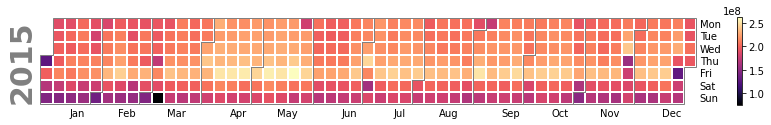

In [8]:
calplot.calplot(df['traffic_daily_volume'], cmap='magma')

Read and explore the stations dataset

In [9]:
stations = pd.read_csv("dot_traffic_stations_2015.txt")
stations.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [10]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

Examining the station locations, a lot of them seem to be on highways, with of the long highways having many stations along the road

In [11]:
stations.station_location.value_counts().head(20)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX    212
I 10                               91
SR 101                             70
US 60                              64
I 17                               54
.                                  46
INTERSTATE 495                     32
I-65 Birmingham                    31
SR 202                             28
YANKEE DIVISION HIGHWAY            24
SR 51                              24
35  I-95  50 FT N OF COWESETT      24
I-285/SR407 B/T ASHFRD DUNWDY      24
SACRAMENTO DEL PASO ROAD SAC5      23
E/O_SR_509_I/C                     22
I 40                               22
S/O_SR_516_I/C                     20
I-285/SR407 @N SHALLOWFORD RD      20
H-1 Freeway at Nuuanu Stream B     20
SH-44  90 Ft. W of Longhorn St     20
Name: station_location, dtype: int64

Each station monitors multiple directions and lanes

In [12]:
stations.lane_of_travel_name.unique()

array(['Other lanes', 'Outside (rightmost) lane',
       'Data with lanes combined'], dtype=object)

In [13]:
stations[(stations['station_id'] == '100094') & (stations["station_location"] == 'I 10')]

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
10892,F,Axle spacing with Scheme F,NaN,NaN,15,0,NaN,3,East,13,4,1U,Urban: Principal Arterial - Interstate,Z96000000378,Y,0,Data with lanes combined,33.462388,112.211527,000000I01000,137190.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,9,6,0,0,0,NaN,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100094,I 10,S,Sonic/acoustic,15,0,90
28201,F,Axle spacing with Scheme F,NaN,NaN,15,0,NaN,7,West,13,4,1U,Urban: Principal Arterial - Interstate,Z96000000378,Y,0,Data with lanes combined,33.462388,112.211527,000000I01000,137190.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,5,6,0,0,0,NaN,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100094,I 10,S,Sonic/acoustic,15,0,90


While some stations indicate their previous station, most of them don't have this information so it's not useful for our analysis

In [14]:
print(f'Number of stations without a previous station: {stations.previous_station_id.isnull().sum()}')

Number of stations without a previous station: 22511


Let's investigate how station ID works by removing duplicates of the triplet ('station_id','fips_county_code','fips_state_code')

In [15]:
stations_columns = [
    'station_id',
    'fips_county_code',
    'fips_state_code',
]

stations_filtered = stations.loc[:,stations_columns]
stations_filtered.drop_duplicates(inplace=True)
stations_filtered

,station_id,fips_county_code,fips_state_code
0,129130,59,6
1,100190,77,6
2,022940,93,6
3,000302,35,49
4,W01136,27,34
...,...,...,...
28303,040282,760,51
28305,190302,3,51
28351,100113,13,4
28390,339003,19,33


A station ID can be reused, even within the same state, as long as they are in different counties. This is troublesome because the traffic dataset only has station_id and the state's FIPS code. If we want to join the 2 datasets, we would be to be on more columns.

In [16]:
stations_filtered[['station_id', 'fips_state_code']].value_counts()

station_id  fips_state_code
002295      11                 3
000831      19                 2
023090      6                  2
001295      11                 2
200003      44                 2
                              ..
000810      46                 1
            42                 1
            19                 1
00080D      34                 1
r02000      35                 1
Length: 8541, dtype: int64

In [17]:
stations_filtered[stations_filtered.station_id=='002295']

,station_id,fips_county_code,fips_state_code
7371,002295,11,11
7524,002295,1,11
23326,002295,0,11


FIPS Code for counties in the USA starts from 1, which means the stations with FIPS code 0 have invalid code

In [18]:
invalid_fips_count = len(stations[stations.fips_county_code==0].index)
print(f'There are {invalid_fips_count} stations with an invalid FIPS County Code')

There are 327 stations with an invalid FIPS County Code


The locations of the stations based on their longitude and latitude are questionationable to say the least - Can't utilize these columns...
![Stations Location](images/stations_location.png)
<b>Run the code</b> below to show the interactive map - Warning: file size can increase significantly

In [19]:
# fig = go.Figure(data=go.Scattergeo(
#         lon = stations['longitude'],
#         lat = stations['latitude'],
#         mode = 'markers'
#         ))

# fig.update_layout(
#         title = 'Station Location',
#         geo_scope='world',
#     )
# fig.show()

Upon further inspection, we've narrowed down the below columns in order to perform the join between the datasets

In [20]:
# intersect_columns = list(set(df_Feb.columns).intersection(set(stations.columns)))
intersect_columns = [
    'station_id',
    'functional_classification',
    'lane_of_travel',
    'fips_state_code',
    'direction_of_travel'
]

Because of the large amount of data, it's better to narrow the scope down for some analysis. Particularly, we're filtering the data to only during February.

In [21]:
period_start = '2015-02-01'
period_end = '2015-02-28'

df_period = df.loc[period_start:period_end]
df_period

,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,traffic_daily_volume,traffice_volume_0_to_6,traffice_volume_6_to_9,traffice_volume_9_to_12,traffice_volume_12_to_17,traffice_volume_17_to_21,traffice_volume_21_to_24
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-18,7,West,55,3R,Rural: Principal Arterial - Other,1,090716,26,18,32,39,93,159,206,251,202,246,176,228,216,226,262,260,311,314,205,148,134,91,74,37,3954,367,659,650,1275,801,202
2015-02-06,5,South,44,1U,Urban: Principal Arterial - Interstate,2,280273,293,186,115,171,248,510,827,991,1008,1015,1159,1140,1200,1257,1279,1327,1278,1341,1109,1037,891,883,779,612,20656,1523,2826,3314,6341,4378,2274
2015-02-13,3,East,29,2U,Urban: Principal Arterial - Other Freeways or ...,2,004702,44,21,27,34,41,27,97,113,154,107,71,99,122,138,154,224,349,452,416,203,99,68,66,107,3233,194,364,277,987,1170,241
2015-02-22,5,South,41,3R,Rural: Principal Arterial - Other,0,019008,0,1,1,1,0,4,2,10,11,21,28,29,21,29,30,21,20,23,10,11,5,7,1,3,289,7,23,78,121,49,11
2015-02-01,1,North,13,4U,Urban: Minor Arterial,2,000243,55,42,49,52,26,27,32,69,124,238,212,280,337,348,333,322,294,233,214,133,111,63,120,82,3796,251,225,730,1634,691,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-06,5,South,19,3R,Rural: Principal Arterial - Other,1,000253,40,30,21,24,38,66,111,181,181,187,215,209,226,258,293,288,330,332,231,162,140,141,66,63,3833,219,473,611,1395,865,270
2015-02-12,5,South,39,2U,Urban: Principal Arterial - Other Freeways or ...,2,000709,4,2,1,2,8,28,195,87,30,36,38,41,26,50,65,58,60,74,53,36,20,17,12,2,945,45,312,115,259,183,31
2015-02-09,1,North,51,3R,Rural: Principal Arterial - Other,0,070214,27,15,29,41,85,161,437,632,544,394,351,266,311,277,308,263,265,258,238,119,90,78,59,39,5287,358,1613,1011,1424,705,176


Let's join the 2 datasets

In [22]:
df_period = df_period.reset_index().merge(stations[intersect_columns + ['fips_county_code', 'latitude', 'longitude']], left_on=intersect_columns, right_on=intersect_columns, how='left')#.set_index('date')

Without the FIPS county code, we can't locate where the station is so let's remove the entries without FIPS County Code or with invalid code. Luckily for us, they only make up a negligible portion of the data

In [23]:
df_period = df_period[(df_period.fips_county_code!=0)][(df_period.fips_county_code.notnull())]
df_period.fips_county_code = df_period.fips_county_code.astype('int64')
df_period

<ipython-input-23-b92e3d13f955>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_period = df_period[(df_period.fips_county_code!=0)][(df_period.fips_county_code.notnull())]


,date,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,traffic_daily_volume,traffice_volume_0_to_6,traffice_volume_6_to_9,traffice_volume_9_to_12,traffice_volume_12_to_17,traffice_volume_17_to_21,traffice_volume_21_to_24,fips_county_code,latitude,longitude
0,2015-02-18,7,West,55,3R,Rural: Principal Arterial - Other,1,090716,26,18,32,39,93,159,206,251,202,246,176,228,216,226,262,260,311,314,205,148,134,91,74,37,3954,367,659,650,1275,801,202,17,44.893800,91.559110
1,2015-02-06,5,South,44,1U,Urban: Principal Arterial - Interstate,2,280273,293,186,115,171,248,510,827,991,1008,1015,1159,1140,1200,1257,1279,1327,1278,1341,1109,1037,891,883,779,612,20656,1523,2826,3314,6341,4378,2274,7,41.808176,71.404615
2,2015-02-13,3,East,29,2U,Urban: Principal Arterial - Other Freeways or ...,2,004702,44,21,27,34,41,27,97,113,154,107,71,99,122,138,154,224,349,452,416,203,99,68,66,107,3233,194,364,277,987,1170,241,47,39.156721,94.436135
3,2015-02-22,5,South,41,3R,Rural: Principal Arterial - Other,0,019008,0,1,1,1,0,4,2,10,11,21,28,29,21,29,30,21,20,23,10,11,5,7,1,3,289,7,23,78,121,49,11,37,41.996540,120.298060
4,2015-02-01,1,North,13,4U,Urban: Minor Arterial,2,000243,55,42,49,52,26,27,32,69,124,238,212,280,337,348,333,322,294,233,214,133,111,63,120,82,3796,251,225,730,1634,691,265,21,32.799530,83.664810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558763,2015-02-06,5,South,19,3R,Rural: Principal Arterial - Other,1,000253,40,30,21,24,38,66,111,181,181,187,215,209,226,258,293,288,330,332,231,162,140,141,66,63,3833,219,473,611,1395,865,270,67,43.006800,92.620900
558764,2015-02-12,5,South,39,2U,Urban: Principal Arterial - Other Freeways or ...,2,000709,4,2,1,2,8,28,195,87,30,36,38,41,26,50,65,58,60,74,53,36,20,17,12,2,945,45,312,115,259,183,31,13,39.974976,80.741530
558765,2015-02-09,1,North,51,3R,Rural: Principal Arterial - Other,0,070214,27,15,29,41,85,161,437,632,544,394,351,266,311,277,308,263,265,258,238,119,90,78,59,39,5287,358,1613,1011,1424,705,176,3,37.891740,78.703040
558766,2015-02-04,3,East,51,1U,Urban: Principal Arterial - Interstate,0,040765,91,64,77,61,90,132,206,332,402,362,374,428,439,448,426,506,550,567,405,249,223,232,173,136,6973,515,940,1164,2369,1444,541,149,37.176300,77.340100


The correct format of the FIPS County Code is the 2 digits of the FIPS State Code follow be the 3 digits of the FIPS County Code so we need to compute the proper format

In [24]:
df_period["full_fips_county_code"] = df_period['fips_state_code'].apply(lambda x: f'{x:02d}') + df_period['fips_county_code'].apply(lambda x: f'{x:03d}')

Prepare the data by using some groupings before charting them on a map

In [25]:
chart_columns = [
    'date', 
    'full_fips_county_code', 
    'traffic_daily_volume',
]

groupby_columns = [
    'date', 
    'full_fips_county_code'
]

df_period_grouped = df_period.loc[:,chart_columns].groupby(by=groupby_columns, as_index=False).agg({'traffic_daily_volume':sum})
df_period_grouped.set_index('date', inplace=True)

# Calculating the log of the traffice volume, this makes the choropleth map looks nicer 
# since the volume gaps between counties can be quite high
df_period_grouped['log_volume'] = np.log10(df_period_grouped['traffic_daily_volume'])
df_period_grouped

D:\Programs\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,full_fips_county_code,traffic_daily_volume,log_volume
date,,,
2015-02-01,01003,33638,4.526830
2015-02-01,01037,5901,3.770926
2015-02-01,01053,4676,3.669875
2015-02-01,01073,16396,4.214738
2015-02-01,01081,25298,4.403086
...,...,...,...
2015-02-28,56037,81292,4.910048
2015-02-28,56039,53441,4.727875
2015-02-28,56041,23156,4.364664


The choropleth below shows the volumes of daily traffic during the month of February 2015 for each counties that contains 1 or more of the stations in the dataset. <br>
It can be seen that most of the traffics are near the coastal areas, where populations are much higher compared to the central areas. Maricopa county of Arizona seems to be the county with the highest volume.
![Traffic Volume by Counties](images/choropleth.png)
<b>Warning</b>: the code can take some time to run before the map can be generated

In [26]:
# # Change this variable to view the traffic volume of certain dates
# choropleth_date = '2015-02-15'

# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# fig = px.choropleth(df_period_grouped.loc[choropleth_date], geojson=counties, 
#                     locations='full_fips_county_code',
#                     color='log_volume',
#                     color_continuous_scale="PuBu",
#                     range_color=(3, 7),
#                     scope="usa",
#                     labels={'log_volume':'Daily Traffic Volume', 
#                             'date':'Date', 
#                             'full_fips_county_code':'County FIPS Code'},
# #                     animation_frame='date', # Animation makes file size explode
#                     title=f'US traffice volume by county on {choropleth_date}'
#                    )

# fig.update_layout(coloraxis_colorbar=dict(
#     tickvals=[3,4,5,6,7],
#     ticktext=['1K','10K','100K','1M','10M'],
# ))

# fig.update_layout(margin={"r":0,"l":0,"b":0})
# fig.show()

Because the population can differ between counties, larger counties would obviously have more traffic volume. To explore a bit more, let's scaled the data to the % of the counties' population. To do that, we would need additional data, particularly the 2015 estimated population of each county. The dataset can be downloaded here: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

In [27]:
population = pd.read_csv('data/co-est2019-alldata.csv')
population = population[[
    'STATE',
    'STNAME',
    'COUNTY',
    'CTYNAME',
    'POPESTIMATE2015'
]]
population["FIPS"] = population['STATE'].apply(lambda x: f'{x:02d}') + population['COUNTY'].apply(lambda x: f'{x:03d}')
population

,STATE,STNAME,COUNTY,CTYNAME,POPESTIMATE2015,FIPS
0,1,Alabama,0,Alabama,4852347,01000
1,1,Alabama,1,Autauga County,54864,01001
2,1,Alabama,3,Baldwin County,202939,01003
3,1,Alabama,5,Barbour County,26283,01005
4,1,Alabama,7,Bibb County,22566,01007
...,...,...,...,...,...,...
3188,56,Wyoming,37,Sweetwater County,44719,56037
3189,56,Wyoming,39,Teton County,23047,56039
3190,56,Wyoming,41,Uinta County,20763,56041
3191,56,Wyoming,43,Washakie County,8278,56043


In [28]:
# Compute the FIPS code similar to how it was done above
df_period_grouped = df_period_grouped.reset_index().merge(population[['FIPS', 'POPESTIMATE2015']], left_on='full_fips_county_code', right_on='FIPS', how='left')

Merge the 2 dataframe and compute the traffic volume by percentage of population

In [29]:
df_period_grouped['traffic_percentage_population'] = df_period_grouped['traffic_daily_volume'] / df_period_grouped['POPESTIMATE2015'] * 100
df_period_grouped.set_index('date', inplace=True)
df_period_grouped

,full_fips_county_code,traffic_daily_volume,log_volume,FIPS,POPESTIMATE2015,traffic_percentage_population
date,,,,,,
2015-02-01,01003,33638,4.526830,01003,202939.0,16.575424
2015-02-01,01037,5901,3.770926,01037,10934.0,53.969270
2015-02-01,01053,4676,3.669875,01053,37661.0,12.416027
2015-02-01,01073,16396,4.214738,01073,660455.0,2.482531
2015-02-01,01081,25298,4.403086,01081,156954.0,16.118098
...,...,...,...,...,...,...
2015-02-28,56037,81292,4.910048,56037,44719.0,181.784029
2015-02-28,56039,53441,4.727875,56039,23047.0,231.878336
2015-02-28,56041,23156,4.364664,56041,20763.0,111.525309


![Traffic Volume by Percentage](images/choropleth2.png)
Run code below to generate the interactive map

In [ ]:
# # Change this variable to view the traffic volume of certain dates
# choropleth_date_2 = '2015-02-15'

# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# fig = px.choropleth(df_period_grouped.loc[choropleth_date_2], geojson=counties, 
#                     locations='full_fips_county_code',
#                     color='traffic_percentage_population',
#                     color_continuous_scale="PuBu",
#                     range_color=(0, 250),
#                     scope="usa",
#                     labels={'traffic_percentage_population':'Daily Traffic Volume by % of population', 
#                             'date':'Date', 
#                             'full_fips_county_code':'County FIPS Code'},
# #                     animation_frame='date', # Animation makes file size explode
#                     title=f'US traffic volume by county on {choropleth_date_2} scaled to county population'
#                    )

# fig.update_layout(margin={"r":0,"l":0,"b":0})
# fig.show()